How to use *scipy's* [`scipy.stats.rv_continuous`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) class to model a continuous random variable.
The scenario is taken from *M343* Book 1, Section 4, where we model the time taken to perform an oil change.

In [1]:
import numpy as np
from scipy import stats as st
import seaborn.objects as so

In [2]:
%load_ext watermark
%watermark --iv

scipy  : 1.9.3
seaborn: 0.12.1
numpy  : 1.23.3



In [3]:
# lower prevision of output
%precision 4

'%.4f'

## Define and initialise the random variable

We declare a new subclass of `rv_continuous`, and override the `_pdf` method.

In [4]:
class oil_change_gen(st.rv_continuous):
    def _pdf(self, t):
        return t / 48

Initialise the random variable.

:::{.callout-note}
Arguments `a, b` refer to the min, max values of the random variable.
If either are `(-inf, inf)`, then you do not need to pass an argument for it.
:::

In [5]:
rv_oil_change = oil_change_gen(a=2, b=10)

### Plot the random variable

Get the event space of the random variable.

In [6]:
ts = np.linspace(rv_oil_change.ppf(0.01), rv_oil_change.ppf(0.99), num=100)

Plot the probability density function.

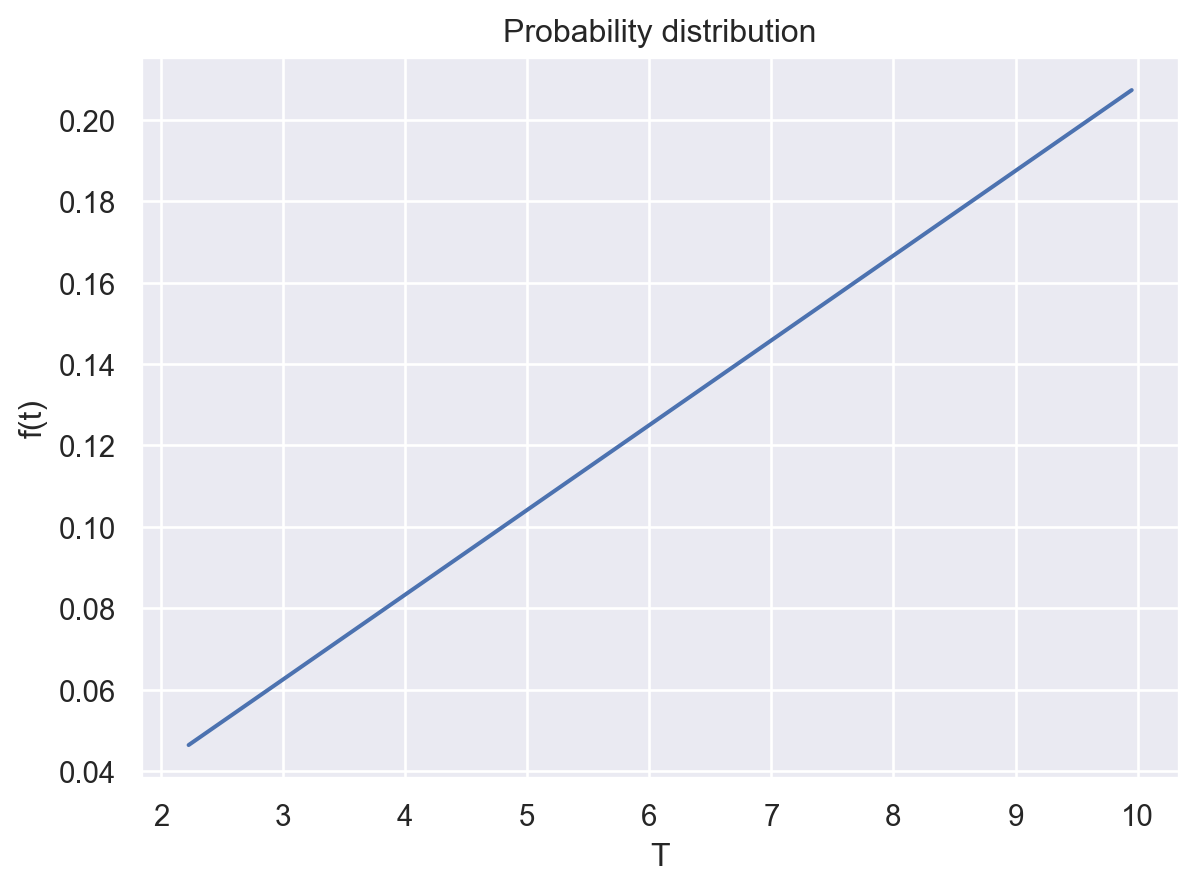

In [7]:
(
    so.Plot(x=ts, y=rv_oil_change.pdf(ts))
    .add(so.Line())
    .label(x='T',
           y='f(t)',
           title='Probability distribution')
)

Plot the cumulative distribution function.

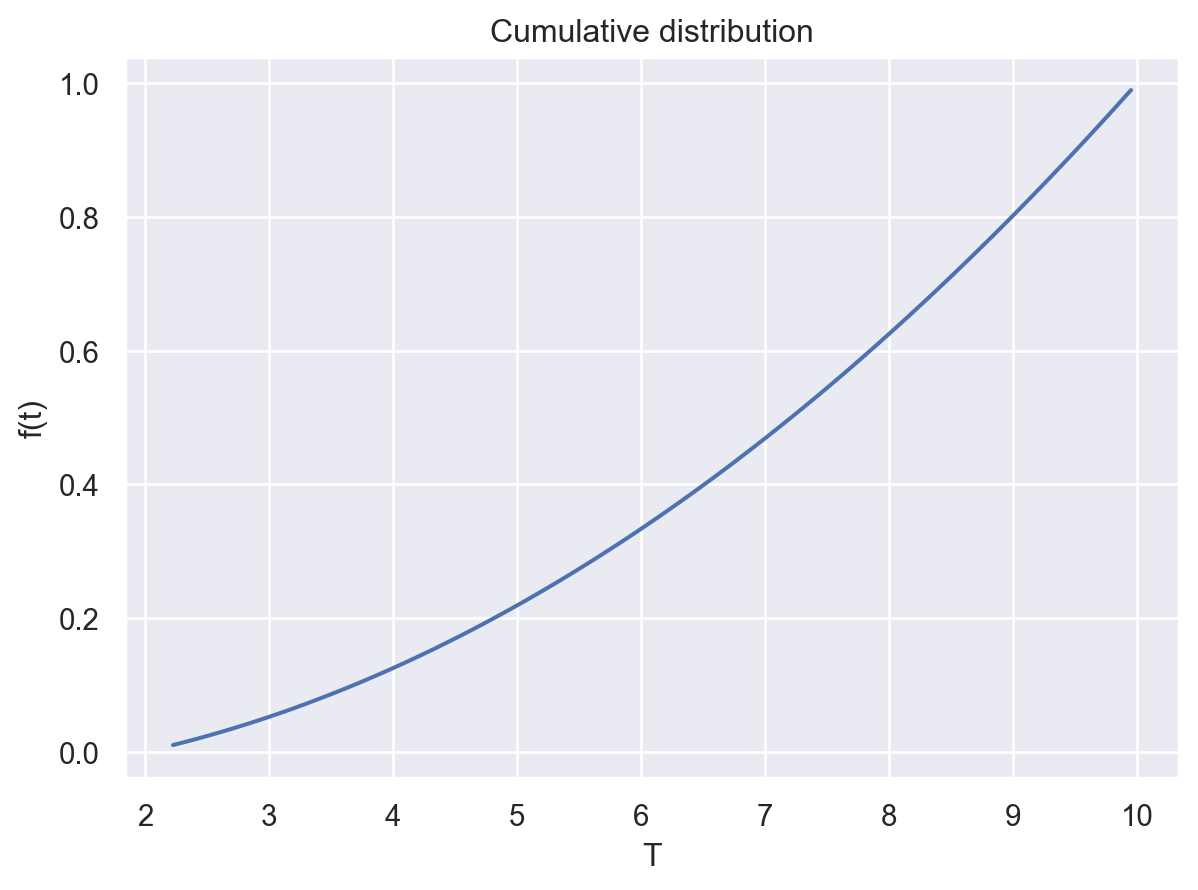

In [8]:
(
    so.Plot(x=ts, y=rv_oil_change.cdf(ts))
    .add(so.Line())
    .label(x='T',
           y='f(t)',
           title='Cumulative distribution')
)

### Calculating probabilities

**(a)**
Return the probability that an oil change takes six minutes or less.

In [9]:
rv_oil_change.cdf(6)

0.3333

**(b)**
Find the probability that an oil change takes more than six minutes but less than seven minutes.

In [10]:
rv_oil_change.cdf(7) - rv_oil_change.cdf(6)

0.1354

**(c)**
Calculate the probability that an oil change takes longer than 3.5 minutes.

In [11]:
rv_oil_change.sf(3.5)

0.9141

### Location and spread

**(a)**
Return the mean and median.

In [12]:
rv_oil_change.mean(), rv_oil_change.median()

(6.8889, 7.2111)

**(b)**
Return the standard deviation, variance, and interquartile range.

In [13]:
def iqr(rv): return rv.ppf(0.75) - rv.ppf(0.25)


rv_oil_change.std(), rv_oil_change.var(), iqr(rv_oil_change)

(2.1315, 4.5432, 3.4263)

### Calculating quantiles

**(a)**
Return the 0.9-quantile.

In [14]:
rv_oil_change.ppf(0.9)

9.5079

**(b)**
Return the quartiles.

In [15]:
rv_oil_change.ppf([0.25, 0.5, 0.75])

array([5.2915, 7.2111, 8.7178])

### Sampling the distribution

Generate a sample of times.

In [16]:
rv_oil_change.rvs(size=5)

array([2.4846, 8.9973, 8.8444, 9.2723, 7.9823])

Plot a frequency histogram of a sample of size *n*=1000.

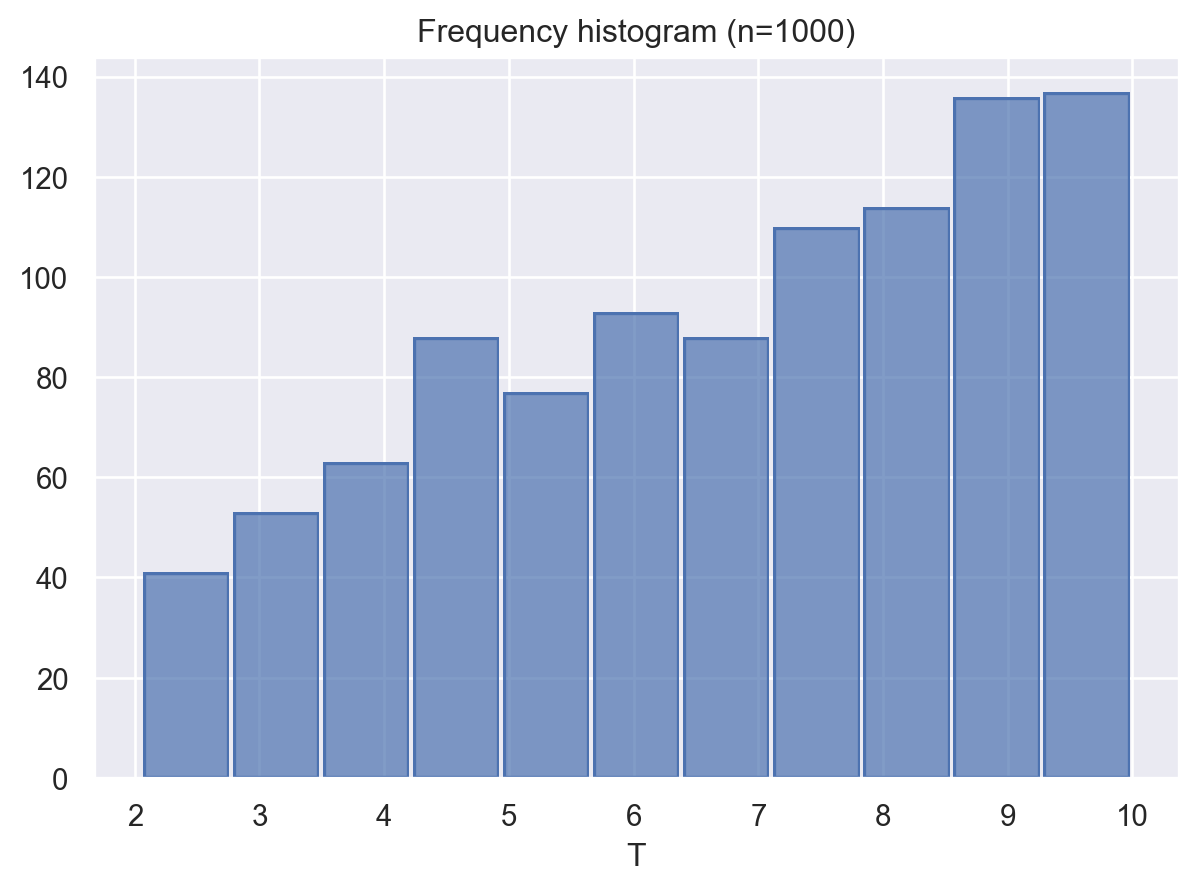

In [17]:
(
    so.Plot(x=rv_oil_change.rvs(size=1000))
    .add(so.Bar(), so.Hist(), so.Dodge(gap=-0.2))  # reduce gap between bars
    .label(x='T', title='Sample')
    .label(title='Frequency histogram (n=1000)')
)